In [1]:
import nltk

LookupError: 
**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
  

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\E17538\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [8]:
with open('train.txt', 'r', encoding='utf-8' ) as f:
    raw = f.read()
    tokens = nltk.word_tokenize(raw)

In [9]:
text = nltk.Text(tokens)

In [92]:
text[:10]

['The', 'basket', "'s", 'gettin', 'full', 'so', 'I', 'might', 'be', 'by']

Using the instruction in [this link](https://towardsdatascience.com/how-to-build-your-first-spam-classifier-in-10-steps-fdbf5b1b3870) I use pandas instead of nltk to prepare the dataset.

In [19]:
import pandas as pd
df = pd.read_csv('train.txt', delimiter = "\n", header=None )
df.columns = ['message']

In [20]:
df

,message
0,The basket's gettin full so I might be by tonight
1,Can i get your opinion on something first?
2,Company is very good.environment is terrific a...
3,Its a valentine game. . . Send dis msg to all ...
4,S.i'm watching it in live..
...,...
3495,Ok lor. I'm in town now lei.
3496,"Aight I've been set free, think you could text..."
3497,No no:)this is kallis home ground.amla home to...
3498,excellent. I spent &lt;#&gt; years in the Ai...


In [23]:
df_label = pd.read_csv('label.txt', delimiter='\n', header = None)
df_label.columns = ['message_type']

In [24]:
df_label

,message_type
0,ham
1,ham
2,ham
3,ham
4,ham
...,...
3495,ham
3496,ham
3497,ham
3498,ham


In [27]:
df_final = pd.concat([df, df_label], axis=1)

In [30]:
df_final[:15]

,message,message_type
0,The basket's gettin full so I might be by tonight,ham
1,Can i get your opinion on something first?,ham
2,Company is very good.environment is terrific a...,ham
3,Its a valentine game. . . Send dis msg to all ...,ham
4,S.i'm watching it in live..,ham
5,Don know:)this week i'm going to tirunelvai da.,ham
6,7 lor... Change 2 suntec... Wat time u coming?,ham
7,"Garbage bags, eggs, jam, bread, hannaford whea...",ham
8,You see the requirements please,ham
9,"Are you being good, baby? :)",ham


In [31]:
df_final['message_type'].value_counts()

ham     3021
spam     479
Name: message_type, dtype: int64

In [33]:
df_spam = df_final[df_final['message_type']=='spam']
df_spam.head()

,message,message_type
13,ringtoneking 84484,spam
14,No 1 POLYPHONIC tone 4 ur mob every week! Just...,spam
16,Sex up ur mobile with a FREE sexy pic of Jorda...,spam
24,Rock yr chik. Get 100's of filthy films &XXX p...,spam
27,18 days to Euro2004 kickoff! U will be kept in...,spam


In [35]:
df_ham = df_final[df_final['message_type']=='ham']
df_ham.head()

,message,message_type
0,The basket's gettin full so I might be by tonight,ham
1,Can i get your opinion on something first?,ham
2,Company is very good.environment is terrific a...,ham
3,Its a valentine game. . . Send dis msg to all ...,ham
4,S.i'm watching it in live..,ham


### World cloud creation for spam messages

In [36]:
spam_list= df_spam['message'].tolist()


In [38]:
spam_list[:2]

['ringtoneking 84484',
 'No 1 POLYPHONIC tone 4 ur mob every week! Just txt PT2 to 87575. 1st Tone FREE ! so get txtin now and tell ur friends. 150p/tone. 16 reply HL 4info']

In [41]:
filtered_spam = [spam.lower() for spam in spam_list]

In [43]:
filtered_spam[:2]

['ringtoneking 84484',
 'no 1 polyphonic tone 4 ur mob every week! just txt pt2 to 87575. 1st tone free ! so get txtin now and tell ur friends. 150p/tone. 16 reply hl 4info']

In [45]:
# !pip install wordcloud
# !pip install pillow

In [49]:
import os
from wordcloud import WordCloud
from PIL import Image
import numpy as np

In [60]:
# comment_mask = np.array(Image.open("comment.png"))
# create and generate a word cloud image
# wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_spam) #mask = comment_mask,

### Create a world cloud:
Refer to [this link](https://stackoverflow.com/questions/45588724/generating-word-cloud-for-items-in-a-list-in-python) where worldcloud library is used to create a world cloud for spams and non spam messages.

In [55]:
from collections import Counter
from matplotlib import pyplot as plt

### 1st way

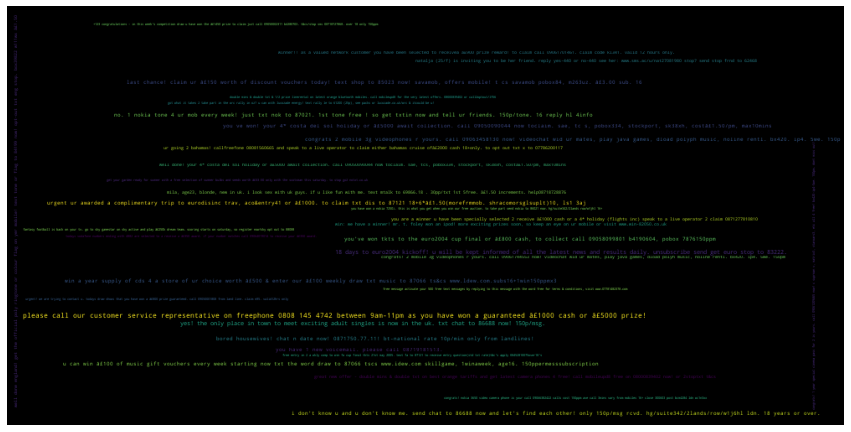

In [59]:
#convert it to dictionary with values and its occurences
from collections import Counter
word_could_dict=Counter(filtered_spam)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
# plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()

### 2nd way

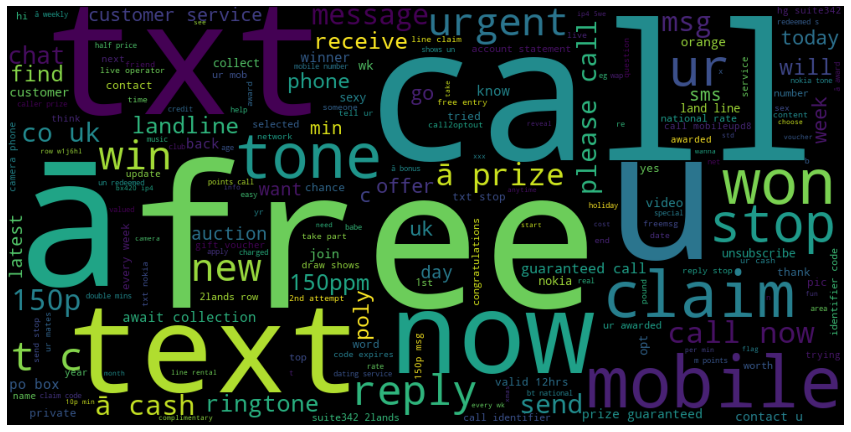

In [58]:
#convert list to string and generate
unique_string=(" ").join(filtered_spam)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
# plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

World cloud for non spams:

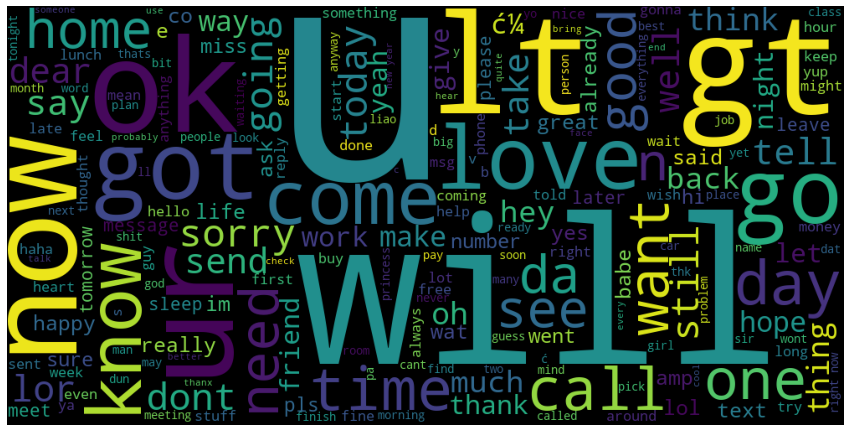

In [61]:
ham_list= df_ham['message'].tolist()
filtered_ham_list = [ham.lower() for ham in ham_list]

#convert list to string and generate
unique_string=(" ").join(filtered_ham_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
# plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

### Handling misbalanced dataset:

Refer to [this link](https://elitedatascience.com/imbalanced-classes) for **resampling**.

In [63]:
df_f = df_final.copy()

In [70]:
# df_final = df_f.copy()

In [71]:
df_final['message_type'] = df_final['message_type'].apply(lambda x: 1 if x=='spam' else 0)

In [72]:
df_final.head(15)

,message,message_type
0,The basket's gettin full so I might be by tonight,0
1,Can i get your opinion on something first?,0
2,Company is very good.environment is terrific a...,0
3,Its a valentine game. . . Send dis msg to all ...,0
4,S.i'm watching it in live..,0
5,Don know:)this week i'm going to tirunelvai da.,0
6,7 lor... Change 2 suntec... Wat time u coming?,0
7,"Garbage bags, eggs, jam, bread, hannaford whea...",0
8,You see the requirements please,0
9,"Are you being good, baby? :)",0


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(df_final['message'], df_final['message_type'], 
                                                    train_size=0.8, random_state=2021)

In [75]:
X_train.head()

3112    Can you plz tell me the ans. BSLVYL sent via f...
1017                       Hi Chikku, send some nice msgs
1969    New Tones This week include: 1)McFly-All Ab..,...
3336               Still otside le..u come 2morrow maga..
1271                               Ya it came a while ago
Name: message, dtype: object

In [78]:
y_train.head()

3112    0
1017    0
1969    1
3336    0
1271    0
Name: message_type, dtype: int64

In [81]:
print('Train size is {}'.format(len(X_train)))
print('Test size is {}'.format(len(X_test)))

Train size is 2800
Test size is 700


In [82]:
2800+700

3500

### Making TF-IDF and count matrix by using sklearn TfidfVectorizer and CountVectorizer 

In [84]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [110]:
lst = X_train.tolist()
vectorizer = TfidfVectorizer(
input= lst ,  # input is the actual text
lowercase=True,      # convert to lowercase before tokenizing
stop_words='english' # remove stop words
)
features_train_transformed = vectorizer.fit_transform(lst) #gives tf idf vector for x_train
features_test_transformed  = vectorizer.transform(X_test) #gives tf idf vector for x_test

In [91]:
features_train_transformed

<2800x5802 sparse matrix of type '<class 'numpy.float64'>'
	with 22041 stored elements in Compressed Sparse Row format>

### Train Naive Bayes

The multinomial Naive Bayes classifier is suitable for classification with
discrete features (e.g., word counts for text classification). The
multinomial distribution normally requires integer feature counts. However,
in practice, fractional counts such as tf-idf may also work.

In [93]:
from sklearn.naive_bayes import MultinomialNB

In [94]:
classifier = MultinomialNB()
classifier.fit(features_train_transformed, y_train)

MultinomialNB()

In [96]:
classifier.score(features_test_transformed, y_test)

0.9571428571428572

### Applying the classifier on test dataframe

This dataframe is not labeled.
To use the trained classifier to predict this dataframe's labels, we need to first calculate TF-IDF matrix of it.To do so we need to use the exact vectorizer from above for fitting.

In [103]:
df_test_nlbl = pd.read_csv('test.txt', delimiter='\n',  encoding='utf-8', header=None)
df_test_nlbl.columns = ['message']

In [104]:
df_test_nlbl.head()

,message
0,Beautiful tomorrow never comes.. When it comes...
1,Cant believe i said so many things to you this...
2,"Bloody hell, cant believe you forgot my surnam..."
3,"(No promises on when though, haven't even gott..."
4,Hello. They are going to the village pub at 8 ...


In [116]:
df_test_nlbl.shape

(2072, 1)

In [111]:
# lst = df_test_nlbl['message'].tolist()
# vectorizer_test = TfidfVectorizer(input= lst, lowercase=True, stop_words='english')
# features_test_nlbl_tfidf = vectorizer_test.fit_transform(lst) #gives tf idf vector for x_train
features_test_nlbl_tfidf = vectorizer.transform(df_test_nlbl['message']) #gives tf idf vector for x_test

In [113]:
predicted_vals = classifier.predict(features_test_nlbl_tfidf)

In [115]:
len(predicted_vals)

2072

In [119]:
df_pred = pd.DataFrame(predicted_vals, columns=['is_spam'])

In [120]:
df_pred.head()

,is_spam
0,0
1,0
2,0
3,0
4,0


In [121]:
df_pred.shape

(2072, 1)

In [129]:
df_pred['is_spam'].to_csv('predicted_labels.csv', header=False, index=False)

In [130]:
df_pred

,is_spam
0,0
1,0
2,0
3,0
4,0
...,...
2067,0
2068,0
2069,0
2070,0
